🔍 Checking environment variables:
Host: localhost
Port: 5433
User: postgres
DB: feedbackdb
✅ Connected! Total feedbacks: 196
Shape: (196, 6)

Column types:
 anon_id               object
section               object
lab_no                object
category              object
comment               object
created_at    datetime64[ns]
dtype: object

Missing values:
 anon_id       0
section       0
lab_no        0
category      0
comment       0
created_at    0
dtype: int64


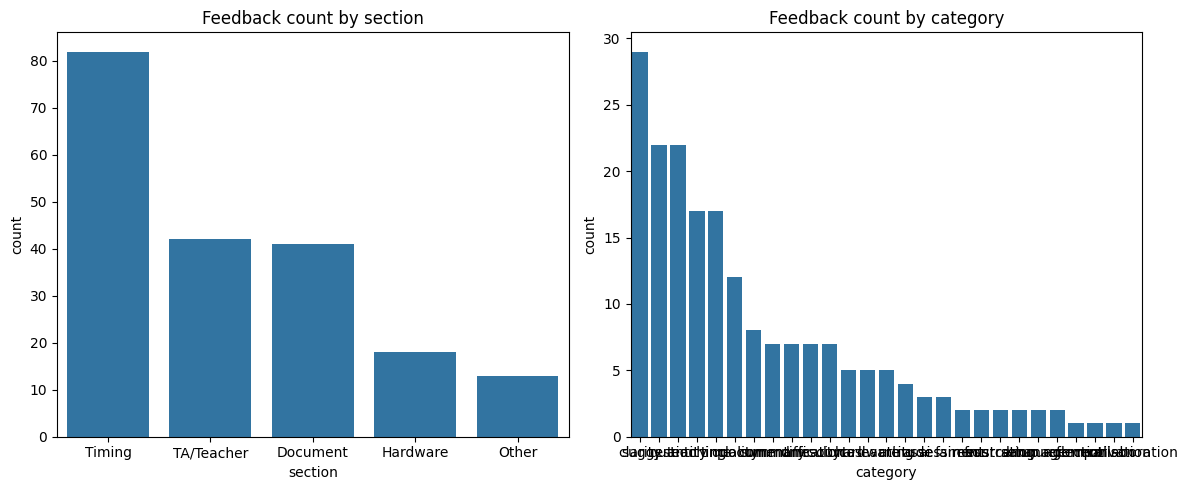

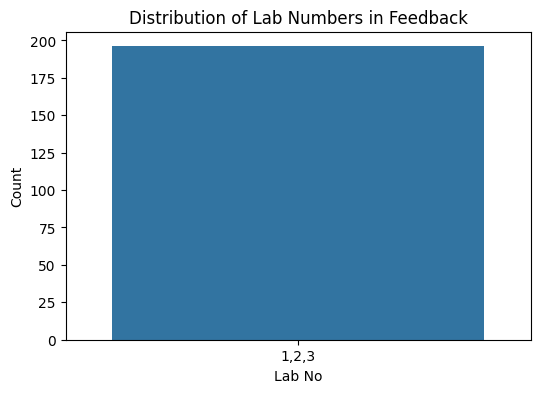

🔍 'เวลา' พบ 46 ครั้ง
🔍 'doc' พบ 35 ครั้ง
🔍 'TA' พบ 55 ครั้ง
🔍 'อาจารย์' พบ 18 ครั้ง


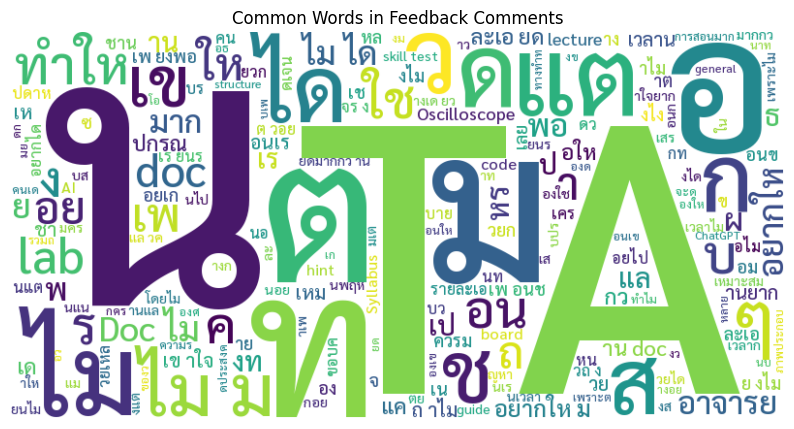

In [1]:
# =========================
# STEP 1: Import libraries
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
font_path = os.path.join(os.getcwd(), "THSarabunNew.ttf")

# โหลดตัวแปรจาก .env
load_dotenv()

print("🔍 Checking environment variables:")
print("Host:", os.getenv("POSTGRES_HOST"))
print("Port:", os.getenv("POSTGRES_PORT"))
print("User:", os.getenv("POSTGRES_USER"))
print("DB:", os.getenv("POSTGRES_DB"))

DB_USER = os.getenv("POSTGRES_USER", "postgres")
DB_PASS = os.getenv("POSTGRES_PASSWORD", "postgres123")
DB_NAME = os.getenv("POSTGRES_DB", "feedbackdb")
DB_PORT = os.getenv("POSTGRES_PORT", "5433")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")

# สร้าง engine เพื่อเชื่อมต่อ PostgreSQL ผ่าน SQLAlchemy
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# ตรวจสอบว่าเชื่อมได้ไหม
with engine.connect() as conn:
    test = conn.execute(text("SELECT COUNT(*) FROM feedback"))
    print("✅ Connected! Total feedbacks:", list(test)[0][0])

# =========================
# STEP 2: Load data
# =========================

query = "SELECT * FROM feedback;"
df = pd.read_sql_query(query, engine)
df.head()

# =========================
# STEP 3: Inspect data
# =========================

print("Shape:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

# =========================
# STEP 4: Count by section / category
# =========================

section_count = df["section"].value_counts().reset_index()
section_count.columns = ["section", "count"]

category_count = df["category"].value_counts().reset_index()
category_count.columns = ["category", "count"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=section_count, x="section", y="count", ax=axes[0])
axes[0].set_title("Feedback count by section")

sns.barplot(data=category_count, x="category", y="count", ax=axes[1])
axes[1].set_title("Feedback count by category")

plt.tight_layout()
plt.show()

# =========================
# STEP 5: Lab distribution
# =========================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="lab_no")
plt.title("Distribution of Lab Numbers in Feedback")
plt.xlabel("Lab No")
plt.ylabel("Count")
plt.show()

# =========================
# STEP 6: Simple keyword search
# =========================

keywords = ["เวลา", "doc", "TA", "อาจารย์"]
for key in keywords:
    mask = df["comment"].str.contains(key, case=False, na=False)
    print(f"🔍 '{key}' พบ {mask.sum()} ครั้ง")

# =========================
# STEP 7: Word Cloud
# =========================

from wordcloud import WordCloud

text = " ".join(df["comment"].dropna())
wc = WordCloud(
    font_path="THSarabunNew.ttf",   # ✅ ใส่ path ของฟอนต์
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Feedback Comments")
plt.show()

